In [129]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")
plt_kwargs = {'figsize': (10, 4)}

In [130]:
eco_rounds = pd.read_csv("../../data/vct_2022/matches/eco_rounds.csv")
#maps_scores = pd.read_csv("../../data/vct_2022/matches/maps_scores.csv")
#eco_stats = pd.read_csv("../../data/vct_2022/matches/eco_stats.csv")

In [131]:
#eco_rounds = eco_rounds.loc[ (eco_rounds["Map"]=="Fracture")]
eco_rounds["Outcome"] = eco_rounds["Outcome"].apply(lambda x: 1 if x == "Win" else 0)
eco_rounds["Loadout Value"] = eco_rounds["Loadout Value"].apply(lambda x: int(x.replace(".","").replace("k","00")))
eco_rounds["Remaining Credits"] = eco_rounds["Remaining Credits"].apply(lambda x: int(x.replace(".","").replace("k","00")))

eco_rounds

,Tournament,Stage,Match Type,Match Name,Map,Round Number,Team,Loadout Value,Remaining Credits,Type,Outcome
0,Valorant Champions 2022,Group Stage,Opening (A),Paper Rex vs EDward Gaming,Pearl,1,Paper Rex,3700,100,Eco: 0-5k,0
1,Valorant Champions 2022,Group Stage,Opening (A),Paper Rex vs EDward Gaming,Pearl,1,EDward Gaming,4000,200,Eco: 0-5k,1
2,Valorant Champions 2022,Group Stage,Opening (A),Paper Rex vs EDward Gaming,Pearl,2,Paper Rex,1200,9600,Eco: 0-5k,0
3,Valorant Champions 2022,Group Stage,Opening (A),Paper Rex vs EDward Gaming,Pearl,2,EDward Gaming,15600,2400,Semi-buy: 10-20k,1
4,Valorant Champions 2022,Group Stage,Opening (A),Paper Rex vs EDward Gaming,Pearl,3,Paper Rex,21300,700,Full buy: 20k+,0
...,...,...,...,...,...,...,...,...,...,...,...
358793,Champions Tour CIS Stage 1: Challengers 1,Closed Qualifier,Grand Final,Natus Vincere vs FunPlus Phoenix,Split,14,FunPlus Phoenix,15100,400,Semi-buy: 10-20k,1
358794,Champions Tour CIS Stage 1: Challengers 1,Closed Qualifier,Grand Final,Natus Vincere vs FunPlus Phoenix,Split,15,Natus Vincere,15700,500,Semi-buy: 10-20k,1
358795,Champions Tour CIS Stage 1: Challengers 1,Closed Qualifier,Grand Final,Natus Vincere vs FunPlus Phoenix,Split,15,FunPlus Phoenix,16900,5700,Semi-buy: 10-20k,0
358796,Champions Tour CIS Stage 1: Challengers 1,Closed Qualifier,Grand Final,Natus Vincere vs FunPlus Phoenix,Split,16,Natus Vincere,20000,4700,Semi-buy: 10-20k,0


In [132]:
maps_scores = pd.read_csv("../../data/vct_2022/matches/maps_scores.csv")
maps_scores.head()

,Tournament,Stage,Match Type,Match Name,Map,Team A,Team A Score,Team A Attacker Score,Team A Defender Score,Team A Overtime Score,Team B,Team B Score,Team B Attacker Score,Team B Defender Score,Team B Overtime Score,Duration
0,Valorant Champions 2022,Group Stage,Opening (A),Paper Rex vs EDward Gaming,Pearl,Paper Rex,13,6,7,NaN,EDward Gaming,11,5,6,NaN,1:16:34
1,Valorant Champions 2022,Group Stage,Opening (A),Paper Rex vs EDward Gaming,Icebox,Paper Rex,5,2,3,NaN,EDward Gaming,13,3,10,NaN,40:51
2,Valorant Champions 2022,Group Stage,Opening (A),Paper Rex vs EDward Gaming,Haven,Paper Rex,13,7,6,NaN,EDward Gaming,8,3,5,NaN,NaN
3,Valorant Champions 2022,Group Stage,Opening (A),Leviatán vs Team Liquid,Haven,Leviatán,13,8,5,NaN,Team Liquid,10,6,4,NaN,1:04:37
4,Valorant Champions 2022,Group Stage,Opening (A),Leviatán vs Team Liquid,Ascent,Leviatán,13,6,7,NaN,Team Liquid,10,4,6,NaN,1:05:07


In [133]:
team_ab_2022 = maps_scores[["Tournament", "Stage", "Match Type", "Match Name", "Map", "Team A", "Team B"]]

team_ab_2022

,Tournament,Stage,Match Type,Match Name,Map,Team A,Team B
0,Valorant Champions 2022,Group Stage,Opening (A),Paper Rex vs EDward Gaming,Pearl,Paper Rex,EDward Gaming
1,Valorant Champions 2022,Group Stage,Opening (A),Paper Rex vs EDward Gaming,Icebox,Paper Rex,EDward Gaming
2,Valorant Champions 2022,Group Stage,Opening (A),Paper Rex vs EDward Gaming,Haven,Paper Rex,EDward Gaming
3,Valorant Champions 2022,Group Stage,Opening (A),Leviatán vs Team Liquid,Haven,Leviatán,Team Liquid
4,Valorant Champions 2022,Group Stage,Opening (A),Leviatán vs Team Liquid,Ascent,Leviatán,Team Liquid
...,...,...,...,...,...,...,...
8879,Champions Tour CIS Stage 1: Challengers 1,Closed Qualifier,Grand Final,Natus Vincere vs FunPlus Phoenix,Bind,Natus Vincere,FunPlus Phoenix
8880,Champions Tour CIS Stage 1: Challengers 1,Closed Qualifier,Grand Final,Natus Vincere vs FunPlus Phoenix,Icebox,Natus Vincere,FunPlus Phoenix
8881,Champions Tour CIS Stage 1: Challengers 1,Closed Qualifier,Grand Final,Natus Vincere vs FunPlus Phoenix,Breeze,Natus Vincere,FunPlus Phoenix
8882,Champions Tour CIS Stage 1: Challengers 1,Closed Qualifier,Grand Final,Natus Vincere vs FunPlus Phoenix,Haven,Natus Vincere,FunPlus Phoenix


In [134]:
keys = ['Tournament', 'Stage', 'Match Type', 'Match Name', 'Map','Team']

Eco_rounds_ab_2022=\
pd.merge(
    team_ab_2022.rename(columns={"Team A":"Team"})\
    ,eco_rounds\
    ,on=keys
)\
.rename(columns={"Loadout Value":"Loadout_A", "Remaining Credits":"Remaining_credit_A", "Type":"Eco_type_A", "Outcome":"Outcome_A"})\
.rename(columns={"Team":"Team A", "Team B":"Team"})\
.set_index(['Tournament', 'Stage', 'Match Type', 'Match Name', 'Map','Team', 'Round Number'])\
.join(eco_rounds\
      .set_index(['Tournament', 'Stage', 'Match Type', 'Match Name', 'Map','Team', 'Round Number'])\
)\
.reset_index()\
.rename(columns={"Loadout Value":"Loadout_B", "Remaining Credits":"Remaining_credit_B", "Type":"Eco_type_B", "Outcome":"Outcome_B"})\
.rename(columns={"Team":"Team B"})

Eco_rounds_ab_2022.head()

,Tournament,Stage,Match Type,Match Name,Map,Team B,Round Number,Team A,Loadout_A,Remaining_credit_A,Eco_type_A,Outcome_A,Loadout_B,Remaining_credit_B,Eco_type_B,Outcome_B
0,Champions Tour Asia-Pacific Stage 1: Challenge...,Group Stage,Decider (A),Made in Thailand vs CERBERUS Esports,Ascent,CERBERUS Esports,1,Made in Thailand,2900,600,Eco: 0-5k,1,3800,200,Eco: 0-5k,0
1,Champions Tour Asia-Pacific Stage 1: Challenge...,Group Stage,Decider (A),Made in Thailand vs CERBERUS Esports,Ascent,CERBERUS Esports,2,Made in Thailand,16400,500,Semi-buy: 10-20k,1,3300,9000,Eco: 0-5k,0
2,Champions Tour Asia-Pacific Stage 1: Challenge...,Group Stage,Decider (A),Made in Thailand vs CERBERUS Esports,Ascent,CERBERUS Esports,3,Made in Thailand,18800,13100,Semi-buy: 10-20k,0,21700,400,Full buy: 20k+,1
3,Champions Tour Asia-Pacific Stage 1: Challenge...,Group Stage,Decider (A),Made in Thailand vs CERBERUS Esports,Ascent,CERBERUS Esports,4,Made in Thailand,22400,1700,Full buy: 20k+,0,22800,7200,Full buy: 20k+,1
4,Champions Tour Asia-Pacific Stage 1: Challenge...,Group Stage,Decider (A),Made in Thailand vs CERBERUS Esports,Ascent,CERBERUS Esports,5,Made in Thailand,9100,8500,Semi-eco: 5-10k,0,21900,3200,Full buy: 20k+,1


In [135]:
Eco_rounds_ab_2022[[ "Eco_type_A", "Eco_type_B", "Outcome_A", "Round Number"]].groupby([ "Eco_type_A", "Eco_type_B", "Outcome_A"]).count()

Round Number
Eco_type_A       Eco_type_B       Outcome_A              
Eco: 0-5k        Eco: 0-5k        0                  8321
                                  1                  9497
                 Full buy: 20k+   0                   649
                                  1                    91
                 Semi-buy: 10-20k 0                  6643
                                  1                   701
                 Semi-eco: 5-10k  0                     3
                                  1                     2
Full buy: 20k+   Eco: 0-5k        0                    77
                                  1                   741
                 Full buy: 20k+   0                 31204
                                  1                 35179
                 Semi-buy: 10-20k 0                  8490
                                  1                 16129
                 Semi-eco: 5-10k  0                  2084
                                  1                 10186
Semi-buy: 10-20k Eco: 0-5k        0                   605
                                  1                  7574
                 Full buy: 20k+   0                 13432
                                  1                  8581
                 Semi-buy: 10-20k 0                  2572
                                  1                  3003
                 Semi-eco: 5-10k  0                   269
                                  1                  1217
Semi-eco: 5-10k  Eco: 0-5k        0                     1
                                  1                     3
                 Full buy: 20k+   0                  8083
                                  1                  2079
                 Semi-buy: 10-20k 0                   975
                                  1                   280
                 Semi-eco: 5-10k  0                     1
                                  1                     3

In [136]:
def RoundRating(LoadOutA, LoadoutB,  OutcomeA):
    LoadoutB = max(LoadoutB, 100)
    LoadOutA = max(LoadOutA, 100)
    if OutcomeA == 1:
        return LoadoutB/LoadOutA
    if OutcomeA == 0:
        return 0
    
def RoundRating2(x, y):
    return 5

In [137]:
Eco_rounds_ab_2022["Rating_A"]=Eco_rounds_ab_2022[["Loadout_A", "Loadout_B", "Outcome_A"]]\
    .apply(lambda row: RoundRating(row["Loadout_A"], row["Loadout_B"], row["Outcome_A"]), axis=1)

Eco_rounds_ab_2022["Rating_B"]=Eco_rounds_ab_2022[["Loadout_A", "Loadout_B", "Outcome_B"]]\
    .apply(lambda row: RoundRating(row["Loadout_B"], row["Loadout_A"], row["Outcome_B"]), axis=1)


Eco_rounds_ab_2022.head(10)

,Tournament,Stage,Match Type,Match Name,Map,Team B,Round Number,Team A,Loadout_A,Remaining_credit_A,Eco_type_A,Outcome_A,Loadout_B,Remaining_credit_B,Eco_type_B,Outcome_B,Rating_A,Rating_B
0,Champions Tour Asia-Pacific Stage 1: Challenge...,Group Stage,Decider (A),Made in Thailand vs CERBERUS Esports,Ascent,CERBERUS Esports,1,Made in Thailand,2900,600,Eco: 0-5k,1,3800,200,Eco: 0-5k,0,1.310345,0.000000
1,Champions Tour Asia-Pacific Stage 1: Challenge...,Group Stage,Decider (A),Made in Thailand vs CERBERUS Esports,Ascent,CERBERUS Esports,2,Made in Thailand,16400,500,Semi-buy: 10-20k,1,3300,9000,Eco: 0-5k,0,0.201220,0.000000
2,Champions Tour Asia-Pacific Stage 1: Challenge...,Group Stage,Decider (A),Made in Thailand vs CERBERUS Esports,Ascent,CERBERUS Esports,3,Made in Thailand,18800,13100,Semi-buy: 10-20k,0,21700,400,Full buy: 20k+,1,0.000000,0.866359
3,Champions Tour Asia-Pacific Stage 1: Challenge...,Group Stage,Decider (A),Made in Thailand vs CERBERUS Esports,Ascent,CERBERUS Esports,4,Made in Thailand,22400,1700,Full buy: 20k+,0,22800,7200,Full buy: 20k+,1,0.000000,0.982456
4,Champions Tour Asia-Pacific Stage 1: Challenge...,Group Stage,Decider (A),Made in Thailand vs CERBERUS Esports,Ascent,CERBERUS Esports,5,Made in Thailand,9100,8500,Semi-eco: 5-10k,0,21900,3200,Full buy: 20k+,1,0.000000,0.415525
5,Champions Tour Asia-Pacific Stage 1: Challenge...,Group Stage,Decider (A),Made in Thailand vs CERBERUS Esports,Ascent,CERBERUS Esports,6,Made in Thailand,21900,2500,Full buy: 20k+,1,22600,6800,Full buy: 20k+,0,1.031963,0.000000
6,Champions Tour Asia-Pacific Stage 1: Challenge...,Group Stage,Decider (A),Made in Thailand vs CERBERUS Esports,Ascent,CERBERUS Esports,7,Made in Thailand,21700,3400,Full buy: 20k+,1,11400,11200,Semi-buy: 10-20k,0,0.525346,0.000000
7,Champions Tour Asia-Pacific Stage 1: Challenge...,Group Stage,Decider (A),Made in Thailand vs CERBERUS Esports,Ascent,CERBERUS Esports,8,Made in Thailand,24100,7200,Full buy: 20k+,0,24400,9300,Full buy: 20k+,1,0.000000,0.987705
8,Champions Tour Asia-Pacific Stage 1: Challenge...,Group Stage,Decider (A),Made in Thailand vs CERBERUS Esports,Ascent,CERBERUS Esports,9,Made in Thailand,23300,3200,Full buy: 20k+,1,24300,19000,Full buy: 20k+,0,1.042918,0.000000
9,Champions Tour Asia-Pacific Stage 1: Challenge...,Group Stage,Decider (A),Made in Thailand vs CERBERUS Esports,Ascent,CERBERUS Esports,10,Made in Thailand,21400,3000,Full buy: 20k+,1,22500,9200,Full buy: 20k+,0,1.051402,0.000000


In [138]:
keys = ['Tournament', 'Stage', 'Match Type', 'Match Name', 'Map','Team A', 'Team B']
grouped5 = Eco_rounds_ab_2022.groupby(keys)
Eco_rounds_ab_2022["Match Rating A"]=grouped5["Rating_A"].transform(lambda x: x.mean())
Eco_rounds_ab_2022["Match Rating B"]=grouped5["Rating_B"].transform(lambda x: x.mean())

Eco_rounds_ab_2022.head(5)

,Tournament,Stage,Match Type,Match Name,Map,Team B,Round Number,Team A,Loadout_A,Remaining_credit_A,Eco_type_A,Outcome_A,Loadout_B,Remaining_credit_B,Eco_type_B,Outcome_B,Rating_A,Rating_B,Match Rating A,Match Rating B
0,Champions Tour Asia-Pacific Stage 1: Challenge...,Group Stage,Decider (A),Made in Thailand vs CERBERUS Esports,Ascent,CERBERUS Esports,1,Made in Thailand,2900,600,Eco: 0-5k,1,3800,200,Eco: 0-5k,0,1.310345,0.000000,0.491066,0.376266
1,Champions Tour Asia-Pacific Stage 1: Challenge...,Group Stage,Decider (A),Made in Thailand vs CERBERUS Esports,Ascent,CERBERUS Esports,2,Made in Thailand,16400,500,Semi-buy: 10-20k,1,3300,9000,Eco: 0-5k,0,0.201220,0.000000,0.491066,0.376266
2,Champions Tour Asia-Pacific Stage 1: Challenge...,Group Stage,Decider (A),Made in Thailand vs CERBERUS Esports,Ascent,CERBERUS Esports,3,Made in Thailand,18800,13100,Semi-buy: 10-20k,0,21700,400,Full buy: 20k+,1,0.000000,0.866359,0.491066,0.376266
3,Champions Tour Asia-Pacific Stage 1: Challenge...,Group Stage,Decider (A),Made in Thailand vs CERBERUS Esports,Ascent,CERBERUS Esports,4,Made in Thailand,22400,1700,Full buy: 20k+,0,22800,7200,Full buy: 20k+,1,0.000000,0.982456,0.491066,0.376266
4,Champions Tour Asia-Pacific Stage 1: Challenge...,Group Stage,Decider (A),Made in Thailand vs CERBERUS Esports,Ascent,CERBERUS Esports,5,Made in Thailand,9100,8500,Semi-eco: 5-10k,0,21900,3200,Full buy: 20k+,1,0.000000,0.415525,0.491066,0.376266


In [139]:
#keys = ['Tournament', 'Stage', 'Match Type', 'Match Name', 'Map','Team A', 'Team B']
grouped6 = Eco_rounds_ab_2022.groupby(["Team A"])
Eco_rounds_ab_2022["Team Rating A"]=grouped6["Rating_A"].transform(lambda x: x.mean())
grouped6 = Eco_rounds_ab_2022.groupby(["Team B"])
Eco_rounds_ab_2022["Team Rating B"]=grouped6["Rating_B"].transform(lambda x: x.mean())

Eco_rounds_ab_2022

,Tournament,Stage,Match Type,Match Name,Map,Team B,Round Number,Team A,Loadout_A,Remaining_credit_A,...,Loadout_B,Remaining_credit_B,Eco_type_B,Outcome_B,Rating_A,Rating_B,Match Rating A,Match Rating B,Team Rating A,Team Rating B
0,Champions Tour Asia-Pacific Stage 1: Challenge...,Group Stage,Decider (A),Made in Thailand vs CERBERUS Esports,Ascent,CERBERUS Esports,1,Made in Thailand,2900,600,...,3800,200,Eco: 0-5k,0,1.310345,0.000000,0.491066,0.376266,0.481650,0.472553
1,Champions Tour Asia-Pacific Stage 1: Challenge...,Group Stage,Decider (A),Made in Thailand vs CERBERUS Esports,Ascent,CERBERUS Esports,2,Made in Thailand,16400,500,...,3300,9000,Eco: 0-5k,0,0.201220,0.000000,0.491066,0.376266,0.481650,0.472553
2,Champions Tour Asia-Pacific Stage 1: Challenge...,Group Stage,Decider (A),Made in Thailand vs CERBERUS Esports,Ascent,CERBERUS Esports,3,Made in Thailand,18800,13100,...,21700,400,Full buy: 20k+,1,0.000000,0.866359,0.491066,0.376266,0.481650,0.472553
3,Champions Tour Asia-Pacific Stage 1: Challenge...,Group Stage,Decider (A),Made in Thailand vs CERBERUS Esports,Ascent,CERBERUS Esports,4,Made in Thailand,22400,1700,...,22800,7200,Full buy: 20k+,1,0.000000,0.982456,0.491066,0.376266,0.481650,0.472553
4,Champions Tour Asia-Pacific Stage 1: Challenge...,Group Stage,Decider (A),Made in Thailand vs CERBERUS Esports,Ascent,CERBERUS Esports,5,Made in Thailand,9100,8500,...,21900,3200,Full buy: 20k+,1,0.000000,0.415525,0.491066,0.376266,0.481650,0.472553
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
178670,Valorant Conquerors Championship,Wildcard Qualifier,Upper Bracket Semifinals,Maruti Peek vs God Particles,Breeze,God Particles,12,Maruti Peek,22300,1700,...,26900,16100,Full buy: 20k+,1,0.000000,0.828996,0.138898,0.631527,0.441116,0.514025
178671,Valorant Conquerors Championship,Wildcard Qualifier,Upper Bracket Semifinals,Maruti Peek vs God Particles,Breeze,God Particles,13,Maruti Peek,3800,300,...,4000,200,Eco: 0-5k,0,1.052632,0.000000,0.138898,0.631527,0.441116,0.514025
178672,Valorant Conquerors Championship,Wildcard Qualifier,Upper Bracket Semifinals,Maruti Peek vs God Particles,Breeze,God Particles,14,Maruti Peek,15400,3000,...,1600,9300,Eco: 0-5k,0,0.103896,0.000000,0.138898,0.631527,0.441116,0.514025
178673,Valorant Conquerors Championship,Wildcard Qualifier,Upper Bracket Semifinals,Maruti Peek vs God Particles,Breeze,God Particles,15,Maruti Peek,21200,8500,...,20600,1000,Full buy: 20k+,1,0.000000,1.029126,0.138898,0.631527,0.441116,0.514025


In [140]:
Eco_rounds_ab_2022[['Tournament', 'Stage', 'Match Type', 'Match Name', 'Map','Team A', 'Team B', 'Team Rating A', 'Team Rating B']]

,Tournament,Stage,Match Type,Match Name,Map,Team A,Team B,Team Rating A,Team Rating B
0,Champions Tour Asia-Pacific Stage 1: Challenge...,Group Stage,Decider (A),Made in Thailand vs CERBERUS Esports,Ascent,Made in Thailand,CERBERUS Esports,0.481650,0.472553
1,Champions Tour Asia-Pacific Stage 1: Challenge...,Group Stage,Decider (A),Made in Thailand vs CERBERUS Esports,Ascent,Made in Thailand,CERBERUS Esports,0.481650,0.472553
2,Champions Tour Asia-Pacific Stage 1: Challenge...,Group Stage,Decider (A),Made in Thailand vs CERBERUS Esports,Ascent,Made in Thailand,CERBERUS Esports,0.481650,0.472553
3,Champions Tour Asia-Pacific Stage 1: Challenge...,Group Stage,Decider (A),Made in Thailand vs CERBERUS Esports,Ascent,Made in Thailand,CERBERUS Esports,0.481650,0.472553
4,Champions Tour Asia-Pacific Stage 1: Challenge...,Group Stage,Decider (A),Made in Thailand vs CERBERUS Esports,Ascent,Made in Thailand,CERBERUS Esports,0.481650,0.472553
...,...,...,...,...,...,...,...,...,...
178670,Valorant Conquerors Championship,Wildcard Qualifier,Upper Bracket Semifinals,Maruti Peek vs God Particles,Breeze,Maruti Peek,God Particles,0.441116,0.514025
178671,Valorant Conquerors Championship,Wildcard Qualifier,Upper Bracket Semifinals,Maruti Peek vs God Particles,Breeze,Maruti Peek,God Particles,0.441116,0.514025
178672,Valorant Conquerors Championship,Wildcard Qualifier,Upper Bracket Semifinals,Maruti Peek vs God Particles,Breeze,Maruti Peek,God Particles,0.441116,0.514025
178673,Valorant Conquerors Championship,Wildcard Qualifier,Upper Bracket Semifinals,Maruti Peek vs God Particles,Breeze,Maruti Peek,God Particles,0.441116,0.514025


In [141]:
Eco_rounds_ab_2022.sort_values(by=["Team Rating A"], ascending=False).head()

,Tournament,Stage,Match Type,Match Name,Map,Team B,Round Number,Team A,Loadout_A,Remaining_credit_A,...,Loadout_B,Remaining_credit_B,Eco_type_B,Outcome_B,Rating_A,Rating_B,Match Rating A,Match Rating B,Team Rating A,Team Rating B
34376,Champions Tour Europe Stage 1: Challengers 1,Open Qualifier,Round of 128,Mkers vs New Genesis Esports,Split,New Genesis Esports,16,Mkers,20900,16000,...,15500,1200,Semi-buy: 10-20k,0,0.741627,0.0,1.286730,0.631490,1.00482,0.4156
34360,Champions Tour Europe Stage 1: Challengers 1,Open Qualifier,Round of 128,Mkers vs New Genesis Esports,Breeze,New Genesis Esports,15,Mkers,16600,9000,...,12800,1200,Semi-buy: 10-20k,0,0.771084,0.0,0.685322,0.170925,1.00482,0.4156
34377,Champions Tour Europe Stage 1: Challengers 1,Open Qualifier,Round of 128,Mkers vs New Genesis Esports,Split,New Genesis Esports,17,Mkers,22700,17100,...,18800,600,Semi-buy: 10-20k,0,0.828194,0.0,1.286730,0.631490,1.00482,0.4156
34346,Champions Tour Europe Stage 1: Challengers 1,Open Qualifier,Round of 128,Mkers vs New Genesis Esports,Breeze,New Genesis Esports,1,Mkers,3800,300,...,3700,200,Eco: 0-5k,0,0.973684,0.0,0.685322,0.170925,1.00482,0.4156
34347,Champions Tour Europe Stage 1: Challengers 1,Open Qualifier,Round of 128,Mkers vs New Genesis Esports,Breeze,New Genesis Esports,2,Mkers,17500,1200,...,1400,9400,Eco: 0-5k,0,0.080000,0.0,0.685322,0.170925,1.00482,0.4156


In [142]:
grouped_rating_df_A = Eco_rounds_ab_2022.groupby(['Tournament', 'Stage', 'Match Type', 'Match Name', 'Map', 'Team A'])["Rating_A"].agg("mean").reset_index()
grouped_rating_df_B = Eco_rounds_ab_2022.groupby(['Tournament', 'Stage', 'Match Type', 'Match Name', 'Map', 'Team B'])["Rating_B"].agg("mean").reset_index()
#print(grouped_rating_df_A.head())
print(grouped_rating_df_B.head())

                                          Tournament        Stage  \
0  Champions Tour Asia-Pacific Stage 1: Challenge...  Group Stage   
1  Champions Tour Asia-Pacific Stage 1: Challenge...  Group Stage   
2  Champions Tour Asia-Pacific Stage 1: Challenge...  Group Stage   
3  Champions Tour Asia-Pacific Stage 1: Challenge...  Group Stage   
4  Champions Tour Asia-Pacific Stage 1: Challenge...  Group Stage   

    Match Type                            Match Name       Map  \
0  Decider (A)  Made in Thailand vs CERBERUS Esports    Ascent   
1  Decider (A)  Made in Thailand vs CERBERUS Esports      Bind   
2  Decider (B)            Persija Esports vs Bonkers      Bind   
3  Decider (B)            Persija Esports vs Bonkers  Fracture   
4  Decider (B)            Persija Esports vs Bonkers     Haven   

             Team B  Rating_B  
0  CERBERUS Esports  0.376266  
1  CERBERUS Esports  0.108876  
2           Bonkers  0.473047  
3           Bonkers  0.375520  
4           Bonkers  0.36521

In [143]:
maps_scores["Team_A_win"] = maps_scores["Team A Score"] > maps_scores["Team B Score"]
maps_scores["Team_B_win"] = maps_scores["Team B Score"] > maps_scores["Team A Score"]

maps_scores.head()

,Tournament,Stage,Match Type,Match Name,Map,Team A,Team A Score,Team A Attacker Score,Team A Defender Score,Team A Overtime Score,Team B,Team B Score,Team B Attacker Score,Team B Defender Score,Team B Overtime Score,Duration,Team_A_win,Team_B_win
0,Valorant Champions 2022,Group Stage,Opening (A),Paper Rex vs EDward Gaming,Pearl,Paper Rex,13,6,7,NaN,EDward Gaming,11,5,6,NaN,1:16:34,True,False
1,Valorant Champions 2022,Group Stage,Opening (A),Paper Rex vs EDward Gaming,Icebox,Paper Rex,5,2,3,NaN,EDward Gaming,13,3,10,NaN,40:51,False,True
2,Valorant Champions 2022,Group Stage,Opening (A),Paper Rex vs EDward Gaming,Haven,Paper Rex,13,7,6,NaN,EDward Gaming,8,3,5,NaN,NaN,True,False
3,Valorant Champions 2022,Group Stage,Opening (A),Leviatán vs Team Liquid,Haven,Leviatán,13,8,5,NaN,Team Liquid,10,6,4,NaN,1:04:37,True,False
4,Valorant Champions 2022,Group Stage,Opening (A),Leviatán vs Team Liquid,Ascent,Leviatán,13,6,7,NaN,Team Liquid,10,4,6,NaN,1:05:07,True,False


In [144]:
maps_scores = maps_scores[["Tournament", "Stage", "Match Type", "Match Name", "Map", "Team A", "Team A Score", "Team_A_win", "Team B", "Team B Score", "Team_B_win"]]

In [145]:
#maps_scores = maps_scores.loc[ (maps_scores["Map"]=="Fracture")]
maps_scores.head()

,Tournament,Stage,Match Type,Match Name,Map,Team A,Team A Score,Team_A_win,Team B,Team B Score,Team_B_win
0,Valorant Champions 2022,Group Stage,Opening (A),Paper Rex vs EDward Gaming,Pearl,Paper Rex,13,True,EDward Gaming,11,False
1,Valorant Champions 2022,Group Stage,Opening (A),Paper Rex vs EDward Gaming,Icebox,Paper Rex,5,False,EDward Gaming,13,True
2,Valorant Champions 2022,Group Stage,Opening (A),Paper Rex vs EDward Gaming,Haven,Paper Rex,13,True,EDward Gaming,8,False
3,Valorant Champions 2022,Group Stage,Opening (A),Leviatán vs Team Liquid,Haven,Leviatán,13,True,Team Liquid,10,False
4,Valorant Champions 2022,Group Stage,Opening (A),Leviatán vs Team Liquid,Ascent,Leviatán,13,True,Team Liquid,10,False


In [146]:
maps_scores.keys()

Index(['Tournament', 'Stage', 'Match Type', 'Match Name', 'Map', 'Team A',
       'Team A Score', 'Team_A_win', 'Team B', 'Team B Score', 'Team_B_win'],
      dtype='object')

In [147]:
final_rating_df =\
      maps_scores.set_index(['Tournament', 'Stage', 'Match Type', 'Match Name', 'Map', 'Team A'])\
                  .join(grouped_rating_df_A\
                        .rename(columns={"Rating_A":"Team_A_rating"})\
                        .set_index(['Tournament', 'Stage', 'Match Type', 'Match Name', 'Map', 'Team A'])\
                  )\
                  .reset_index()\
                  .set_index(['Tournament', 'Stage', 'Match Type', 'Match Name', 'Map', 'Team B'])\
                  .join(grouped_rating_df_B\
                        .rename(columns={"Rating_B":"Team_B_rating"})\
                        .set_index(['Tournament', 'Stage', 'Match Type', 'Match Name', 'Map', 'Team B'])\
                  )\
                  .reset_index()

In [148]:
final_rating_df

,Tournament,Stage,Match Type,Match Name,Map,Team B,Team A,Team A Score,Team_A_win,Team B Score,Team_B_win,Team_A_rating,Team_B_rating
0,Champions Tour Asia-Pacific Stage 1: Challenge...,Group Stage,Decider (A),Made in Thailand vs CERBERUS Esports,Ascent,CERBERUS Esports,Made in Thailand,13,True,8,False,0.491066,0.376266
1,Champions Tour Asia-Pacific Stage 1: Challenge...,Group Stage,Decider (A),Made in Thailand vs CERBERUS Esports,Bind,CERBERUS Esports,Made in Thailand,13,True,3,False,0.548903,0.108876
2,Champions Tour Asia-Pacific Stage 1: Challenge...,Group Stage,Decider (B),Persija Esports vs Bonkers,Bind,Bonkers,Persija Esports,15,False,17,True,0.424027,0.473047
3,Champions Tour Asia-Pacific Stage 1: Challenge...,Group Stage,Decider (B),Persija Esports vs Bonkers,Fracture,Bonkers,Persija Esports,15,True,13,False,0.413100,0.375520
4,Champions Tour Asia-Pacific Stage 1: Challenge...,Group Stage,Decider (B),Persija Esports vs Bonkers,Haven,Bonkers,Persija Esports,15,True,13,False,0.497852,0.365217
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8879,Valorant Conquerors Championship,Wildcard Qualifier,Upper Bracket Round 1,M1syl and friends vs Salt Esports,Haven,Salt Esports,M1syl and friends,13,True,11,False,0.461971,0.403826
8880,Valorant Conquerors Championship,Wildcard Qualifier,Upper Bracket Semifinals,Global Esports vs M1syl and friends,Bind,M1syl and friends,Global Esports,13,True,4,False,0.612112,0.295866
8881,Valorant Conquerors Championship,Wildcard Qualifier,Upper Bracket Semifinals,Global Esports vs M1syl and friends,Breeze,M1syl and friends,Global Esports,13,True,8,False,0.480581,0.272609
8882,Valorant Conquerors Championship,Wildcard Qualifier,Upper Bracket Semifinals,Maruti Peek vs God Particles,Ascent,God Particles,Maruti Peek,3,False,13,True,0.189262,0.528154


In [149]:
len(final_rating_df)

8884

In [150]:
final_rating_df.Team_A_rating.isna().sum()

113

In [151]:

final_rating_df=final_rating_df.dropna()

In [152]:
final_rating_df.Team_A_rating.isna().sum()

0

In [153]:
final_rating_df.sort_values(by=["Team_A_rating"], ascending=False).head()


,Tournament,Stage,Match Type,Match Name,Map,Team B,Team A,Team A Score,Team_A_win,Team B Score,Team_B_win,Team_A_rating,Team_B_rating
807,Champions Tour Brazil Stage 2: Challengers,Open Qualifier #1,Round of 32,Rise Gaming vs Arca do Plato,Fracture,Arca do Plato,Rise Gaming,13,True,5,False,3.960567,0.313900
639,Champions Tour Brazil Stage 2: Challengers,Access Series,Lower Round 1,MIBR vs Team Vikings,Ascent,Team Vikings,MIBR,13,True,5,False,3.104589,0.287117
8756,Valorant Conquerors Championship,India Qualifier #1,Semifinals,Global Esports vs True Rippers,Bind,True Rippers,Global Esports,13,True,4,False,3.091143,0.237268
1166,Champions Tour CIS Stage 1: Challengers 1,Open Qualifier,Round of 64,EZ KATKA vs abushki,Ascent,abushki,EZ KATKA,13,True,5,False,2.339586,0.376461
7974,Oceania Tour: Stage 1,Open Qualifier,Lower Bracket Semifinals,ex-Wildcard Gaming vs Funcrew,Bind,Funcrew,ex-Wildcard Gaming,10,False,13,True,1.786748,0.479374


In [154]:
final_rating_df.sort_values(by=["Team_B_rating"], ascending=False).head()

,Tournament,Stage,Match Type,Match Name,Map,Team B,Team A,Team A Score,Team_A_win,Team B Score,Team_B_win,Team_A_rating,Team_B_rating
8412,Skyesports Champions Series,Regional Qualifiers: India,Grand Final,Reckoning Esports vs Team Valor,Ascent,Team Valor,Reckoning Esports,5,False,13,True,0.273710,3.468709
8849,Valorant Conquerors Championship,Sri Lanka and Maldives Qualifier,Grand Final,Crash Landin on You vs Union Gaming,Haven,Union Gaming,Crash Landin on You,2,False,13,True,0.221845,2.444175
7303,Champions Tour Thailand Stage 2: Challengers,Open Qualifier,Lower Round 1,Sweet Assist vs Sixtynine,Icebox,Sixtynine,Sweet Assist,9,False,13,True,0.472542,2.404247
2059,Champions Tour Europe Stage 1: Challengers 1,Open Qualifier,Round of 64,Bang Average vs azzi's anime aimers,Ascent,azzi's anime aimers,Bang Average,6,False,13,True,0.280940,2.084404
2946,Champions Tour Indonesia Stage 1: Challengers,Open Qualifier #2,Round 1,Dewa United Esports vs Bigetron Arctic,Split,Bigetron Arctic,Dewa United Esports,8,False,13,True,1.184705,1.996550


In [155]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

In [156]:
final_rating_df.keys()

Index(['Tournament', 'Stage', 'Match Type', 'Match Name', 'Map', 'Team B',
       'Team A', 'Team A Score', 'Team_A_win', 'Team B Score', 'Team_B_win',
       'Team_A_rating', 'Team_B_rating'],
      dtype='object')

In [157]:
scaler = StandardScaler()
scaler_A = StandardScaler()
scaler_B = StandardScaler()

scaler.fit(pd.concat([final_rating_df.Team_A_rating, final_rating_df.Team_B_rating]).to_numpy().reshape(-1,1))
scaler_A.fit(final_rating_df.Team_A_rating.to_numpy().reshape(-1,1))
scaler_B.fit(final_rating_df.Team_B_rating.to_numpy().reshape(-1,1))

StandardScaler()

In [158]:
print("mean of ratings:", scaler.mean_)
print("variance of ratings:", scaler.var_)

print("mean of team A ratings:", scaler_A.mean_)
print("variance of team B ratings:", scaler_A.var_)

print("mean of team B ratings:", scaler_B.mean_)
print("variance of team B ratings:", scaler_B.var_)

mean of ratings: [0.46417717]
variance of ratings: [0.03701949]
mean of team A ratings: [0.49351806]
variance of team B ratings: [0.03568052]
mean of team B ratings: [0.43483628]
variance of team B ratings: [0.03663669]


In [159]:
alpha = 0.3  # Opacity of scatter plot

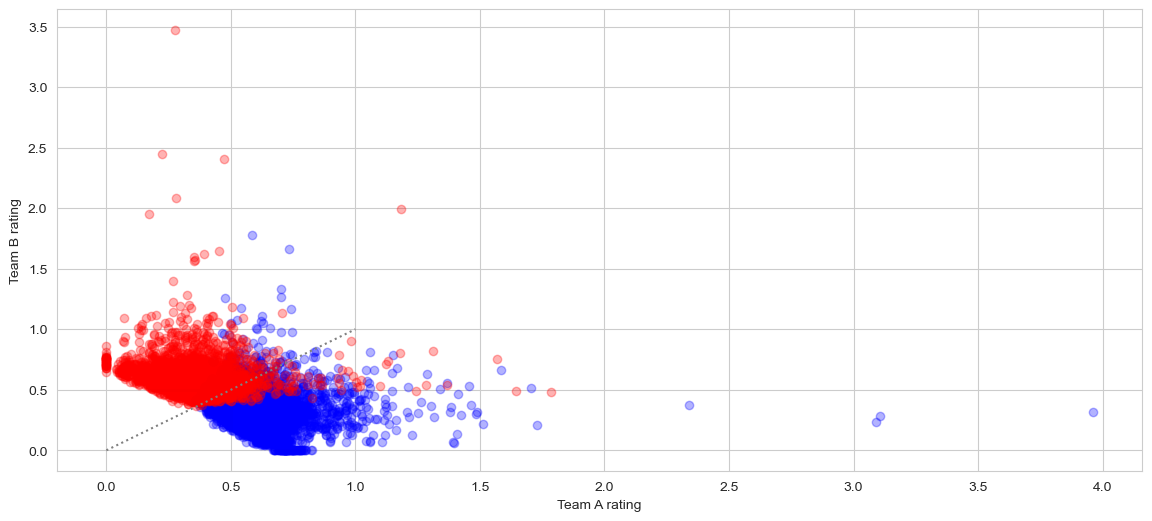

In [160]:
plt.figure(figsize=(14,6))
#plt.subplot(1, 2, 1)  # row 1, column 2, count 1

plt.scatter(
    final_rating_df[final_rating_df.Team_A_win == True].Team_A_rating,
    final_rating_df[final_rating_df.Team_A_win == True].Team_B_rating,
    c="blue",
    alpha=alpha,
    label = "A win"
)

plt.scatter(
    final_rating_df[final_rating_df.Team_A_win == False].Team_A_rating,
    final_rating_df[final_rating_df.Team_A_win == False].Team_B_rating,
    c="red",
    alpha=alpha,
    label= "B win"
)
plt.plot(range(0,2), range(0,2), linestyle="dotted", color="grey", label="A rating = B rating")
plt.xlabel("Team A rating")
plt.ylabel("Team B rating")

# using subplot function and creating plot two
# row 1, column 2, count 2
# plt.subplot(1, 2, 2)
 
# plt.scatter(
#     scaler.transform(final_rating_df[final_rating_df.Team_A_win == True].Team_A_rating.to_numpy().reshape(-1,1)),
#     scaler.transform(final_rating_df[final_rating_df.Team_A_win == True].Team_B_rating.to_numpy().reshape(-1,1)),
#     c="blue",
#     alpha=alpha,
#     label="A win"
# )

# plt.scatter(
#     scaler.transform(final_rating_df[final_rating_df.Team_A_win == False].Team_A_rating.to_numpy().reshape(-1,1)),
#     scaler.transform(final_rating_df[final_rating_df.Team_A_win == False].Team_B_rating.to_numpy().reshape(-1,1)),
#     c="red",
#     alpha=alpha,
#     label ="B win"
# )

# plt.plot(range(-4,5), range(-4,5), linestyle="dotted", color="grey", label="A rating = B rating")
# plt.legend(loc="upper center", bbox_to_anchor=(1.2, 1))

# plt.xlabel("Team A rating scaled")
# plt.ylabel("Team B rating scaled")
 
plt.show()

In [161]:
print("mean of team A win:", np.mean(final_rating_df.Team_A_win))
print("mean of team B win:", np.mean(final_rating_df.Team_B_win))

mean of team A win: 0.5878463117090411
mean of team B win: 0.41215368829095883


In [162]:
lr = LogisticRegression()
X = final_rating_df[["Team_A_rating", "Team_B_rating"]]
y = final_rating_df.Team_A_win.to_numpy().reshape(-1,1)

In [163]:
X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=True, stratify=y)

In [164]:
lr.fit(X_train, y_train)
pred = lr.predict(X_test)
acc = accuracy_score(y_test, pred)
print("mean of true value:", np.mean(y_test))
print("mean of prediction:", np.mean(pred))
print("Accuracy:", acc)

mean of true value: 0.5877792977656179
mean of prediction: 0.590515275877793
Accuracy: 0.9407204742362061


c:\Users\parab\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


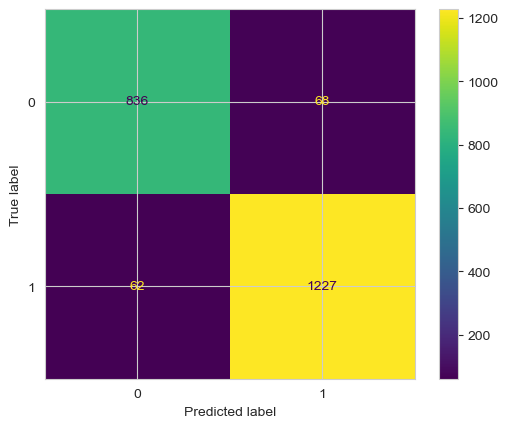

In [165]:
cm = confusion_matrix(y_test, pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

Before chams 2022

In [166]:
chams_2022_team_rating = final_rating_df.loc[final_rating_df["Tournament"]=="Valorant Champions 2022"]

In [167]:
chams_2022_team_rating

,Tournament,Stage,Match Type,Match Name,Map,Team B,Team A,Team A Score,Team_A_win,Team B Score,Team_B_win,Team_A_rating,Team_B_rating
8478,Valorant Champions 2022,Group Stage,Decider (A),Paper Rex vs Team Liquid,Ascent,Team Liquid,Paper Rex,8,False,13,True,0.331132,0.479383
8479,Valorant Champions 2022,Group Stage,Decider (A),Paper Rex vs Team Liquid,Haven,Team Liquid,Paper Rex,13,False,15,True,0.513342,0.717446
8480,Valorant Champions 2022,Group Stage,Decider (A),Paper Rex vs Team Liquid,Pearl,Team Liquid,Paper Rex,13,True,4,False,0.589051,0.301610
8481,Valorant Champions 2022,Group Stage,Decider (B),LOUD vs ZETA DIVISION,Ascent,ZETA DIVISION,LOUD,13,True,5,False,0.563071,0.440531
8482,Valorant Champions 2022,Group Stage,Decider (B),LOUD vs ZETA DIVISION,Bind,ZETA DIVISION,LOUD,13,True,11,False,0.462611,0.344351
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8559,Valorant Champions 2022,Playoffs,Upper Semifinals,DRX vs LOUD,Breeze,LOUD,DRX,11,False,13,True,0.352295,0.474494
8560,Valorant Champions 2022,Playoffs,Upper Semifinals,DRX vs LOUD,Haven,LOUD,DRX,6,False,13,True,0.318067,0.478634
8561,Valorant Champions 2022,Playoffs,Upper Semifinals,OpTic Gaming vs XSET,Ascent,XSET,OpTic Gaming,11,False,13,True,0.351552,0.455015
8562,Valorant Champions 2022,Playoffs,Upper Semifinals,OpTic Gaming vs XSET,Haven,XSET,OpTic Gaming,13,True,9,False,0.480714,0.280834


In [168]:
lr2 = LogisticRegression()
W_train = final_rating_df[final_rating_df["Tournament"] != "Valorant Champions 2022"][["Team_A_rating", "Team_B_rating"]]
z_train = final_rating_df[final_rating_df["Tournament"] != "Valorant Champions 2022"].Team_A_win.to_numpy().reshape(-1,1)

W_test = chams_2022_team_rating[["Team_A_rating", "Team_B_rating"]]
z_test = chams_2022_team_rating.Team_A_win.to_numpy().reshape(-1,1)

In [169]:
print(len(W_train), len(W_test), len(final_rating_df))
print(len(W_train)+ len(W_test), len(final_rating_df))

8686 85 8771
8771 8771


In [170]:
lr2.fit(W_train, z_train)
pred2 = lr2.predict(W_test)
acc2 = accuracy_score(z_test, pred2)
print("mean of true values:", np.mean(z_test))
print("mean of prediction:", np.mean(pred2))
print("Accuracy:", acc2)

mean of true values: 0.5647058823529412
mean of prediction: 0.5882352941176471
Accuracy: 0.9529411764705882


c:\Users\parab\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


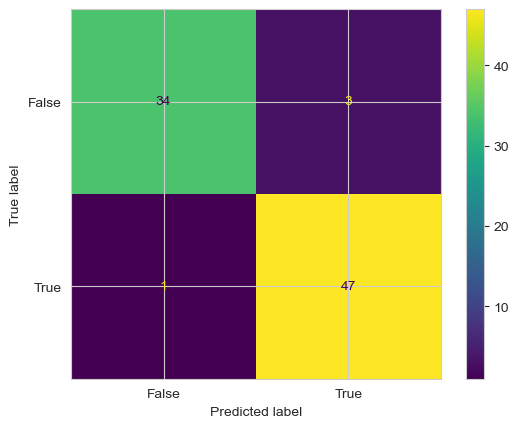

In [171]:
cm2 = confusion_matrix(z_test, pred2, labels=lr2.classes_)
disp2 = ConfusionMatrixDisplay(confusion_matrix=cm2,
                              display_labels=lr2.classes_)
disp2.plot()
plt.show()

Overall rating

In [172]:
grouped_overall_rating_df_A = Eco_rounds_ab_2022.groupby(['Team A'])["Rating_A"].agg("mean").reset_index()
grouped_overall_rating_df_B = Eco_rounds_ab_2022.groupby(['Team B'])["Rating_B"].agg("mean").reset_index()
#print(grouped_rating_df_A.head())
print(grouped_overall_rating_df_A.head(20))

                    Team A  Rating_A
0    Frederikssund Vikings  0.311646
1                    0Zero  0.525734
2              100 Thieves  0.511485
3                   100paz  0.662469
4                     1337  0.611784
5                  18again  0.278427
6                19esports  0.541912
7                 1Percent  0.346038
8         1gameandwegohome  0.413046
9              3 Gün Yeter  0.670709
10             303 Esports  0.434621
11                36NUMBER  0.615969
12              3P eSports  0.494366
13         4 ruim e 1 ruim  0.529639
14               47 Gaming  0.467371
15               5 SAHABAT  0.348847
16             5 of a Kind  0.265587
17                  5MOKES  0.445959
18                  5ORDIC  0.530544
19     717 Monster Esports  0.381293


In [173]:
chams_2022 =  maps_scores.loc[ (maps_scores["Tournament"]=="Valorant Champions 2022")]
len(chams_2022)

86

In [174]:
champs_rating_overall_df = chams_2022.merge(grouped_overall_rating_df_A, on=["Team A"], how="left")
champs_rating_overall_df

,Tournament,Stage,Match Type,Match Name,Map,Team A,Team A Score,Team_A_win,Team B,Team B Score,Team_B_win,Rating_A
0,Valorant Champions 2022,Group Stage,Opening (A),Paper Rex vs EDward Gaming,Pearl,Paper Rex,13,True,EDward Gaming,11,False,0.566734
1,Valorant Champions 2022,Group Stage,Opening (A),Paper Rex vs EDward Gaming,Icebox,Paper Rex,5,False,EDward Gaming,13,True,0.566734
2,Valorant Champions 2022,Group Stage,Opening (A),Paper Rex vs EDward Gaming,Haven,Paper Rex,13,True,EDward Gaming,8,False,0.566734
3,Valorant Champions 2022,Group Stage,Opening (A),Leviatán vs Team Liquid,Haven,Leviatán,13,True,Team Liquid,10,False,0.493071
4,Valorant Champions 2022,Group Stage,Opening (A),Leviatán vs Team Liquid,Ascent,Leviatán,13,True,Team Liquid,10,False,0.493071
...,...,...,...,...,...,...,...,...,...,...,...,...
81,Valorant Champions 2022,Playoffs,Lower Final,OpTic Gaming vs DRX,Haven,OpTic Gaming,13,True,DRX,10,False,0.486837
82,Valorant Champions 2022,Playoffs,Grand Final,LOUD vs OpTic Gaming,Ascent,LOUD,15,True,OpTic Gaming,13,False,0.531671
83,Valorant Champions 2022,Playoffs,Grand Final,LOUD vs OpTic Gaming,Bind,LOUD,6,False,OpTic Gaming,13,True,0.531671
84,Valorant Champions 2022,Playoffs,Grand Final,LOUD vs OpTic Gaming,Breeze,LOUD,16,True,OpTic Gaming,14,False,0.531671


In [175]:
champs_rating_overall_df = champs_rating_overall_df.merge(grouped_overall_rating_df_B, on=["Team B"], how="left")
champs_rating_overall_df

,Tournament,Stage,Match Type,Match Name,Map,Team A,Team A Score,Team_A_win,Team B,Team B Score,Team_B_win,Rating_A,Rating_B
0,Valorant Champions 2022,Group Stage,Opening (A),Paper Rex vs EDward Gaming,Pearl,Paper Rex,13,True,EDward Gaming,11,False,0.566734,0.542267
1,Valorant Champions 2022,Group Stage,Opening (A),Paper Rex vs EDward Gaming,Icebox,Paper Rex,5,False,EDward Gaming,13,True,0.566734,0.542267
2,Valorant Champions 2022,Group Stage,Opening (A),Paper Rex vs EDward Gaming,Haven,Paper Rex,13,True,EDward Gaming,8,False,0.566734,0.542267
3,Valorant Champions 2022,Group Stage,Opening (A),Leviatán vs Team Liquid,Haven,Leviatán,13,True,Team Liquid,10,False,0.493071,0.520991
4,Valorant Champions 2022,Group Stage,Opening (A),Leviatán vs Team Liquid,Ascent,Leviatán,13,True,Team Liquid,10,False,0.493071,0.520991
...,...,...,...,...,...,...,...,...,...,...,...,...,...
81,Valorant Champions 2022,Playoffs,Lower Final,OpTic Gaming vs DRX,Haven,OpTic Gaming,13,True,DRX,10,False,0.486837,0.587306
82,Valorant Champions 2022,Playoffs,Grand Final,LOUD vs OpTic Gaming,Ascent,LOUD,15,True,OpTic Gaming,13,False,0.531671,0.490538
83,Valorant Champions 2022,Playoffs,Grand Final,LOUD vs OpTic Gaming,Bind,LOUD,6,False,OpTic Gaming,13,True,0.531671,0.490538
84,Valorant Champions 2022,Playoffs,Grand Final,LOUD vs OpTic Gaming,Breeze,LOUD,16,True,OpTic Gaming,14,False,0.531671,0.490538


In [176]:
champs_rating_overall_df=champs_rating_overall_df.rename(columns={"Rating_A":"Team_A_rating", "Rating_B":"Team_B_rating"})
champs_rating_overall_df

,Tournament,Stage,Match Type,Match Name,Map,Team A,Team A Score,Team_A_win,Team B,Team B Score,Team_B_win,Team_A_rating,Team_B_rating
0,Valorant Champions 2022,Group Stage,Opening (A),Paper Rex vs EDward Gaming,Pearl,Paper Rex,13,True,EDward Gaming,11,False,0.566734,0.542267
1,Valorant Champions 2022,Group Stage,Opening (A),Paper Rex vs EDward Gaming,Icebox,Paper Rex,5,False,EDward Gaming,13,True,0.566734,0.542267
2,Valorant Champions 2022,Group Stage,Opening (A),Paper Rex vs EDward Gaming,Haven,Paper Rex,13,True,EDward Gaming,8,False,0.566734,0.542267
3,Valorant Champions 2022,Group Stage,Opening (A),Leviatán vs Team Liquid,Haven,Leviatán,13,True,Team Liquid,10,False,0.493071,0.520991
4,Valorant Champions 2022,Group Stage,Opening (A),Leviatán vs Team Liquid,Ascent,Leviatán,13,True,Team Liquid,10,False,0.493071,0.520991
...,...,...,...,...,...,...,...,...,...,...,...,...,...
81,Valorant Champions 2022,Playoffs,Lower Final,OpTic Gaming vs DRX,Haven,OpTic Gaming,13,True,DRX,10,False,0.486837,0.587306
82,Valorant Champions 2022,Playoffs,Grand Final,LOUD vs OpTic Gaming,Ascent,LOUD,15,True,OpTic Gaming,13,False,0.531671,0.490538
83,Valorant Champions 2022,Playoffs,Grand Final,LOUD vs OpTic Gaming,Bind,LOUD,6,False,OpTic Gaming,13,True,0.531671,0.490538
84,Valorant Champions 2022,Playoffs,Grand Final,LOUD vs OpTic Gaming,Breeze,LOUD,16,True,OpTic Gaming,14,False,0.531671,0.490538


In [177]:
lr3 = LogisticRegression()
A_train = final_rating_df[final_rating_df["Tournament"] != "Valorant Champions 2022"][["Team_A_rating", "Team_B_rating"]]
b_train = final_rating_df[final_rating_df["Tournament"] != "Valorant Champions 2022"].Team_A_win.to_numpy().reshape(-1,1)

A_test = champs_rating_overall_df[["Team_A_rating", "Team_B_rating"]]
b_test = champs_rating_overall_df.Team_A_win.to_numpy().reshape(-1,1)

In [178]:
print(len(A_train), len(b_test))

8686 86


In [179]:
lr3.fit(A_train, b_train)
pred3 = lr3.predict(A_test)
acc3 = accuracy_score(b_test, pred3)
print("mean of true values:", np.mean(b_test))
print("mean of prediction:", np.mean(pred3))
print("Accuracy:", acc3)

mean of true values: 0.5581395348837209
mean of prediction: 0.6744186046511628
Accuracy: 0.5581395348837209


c:\Users\parab\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


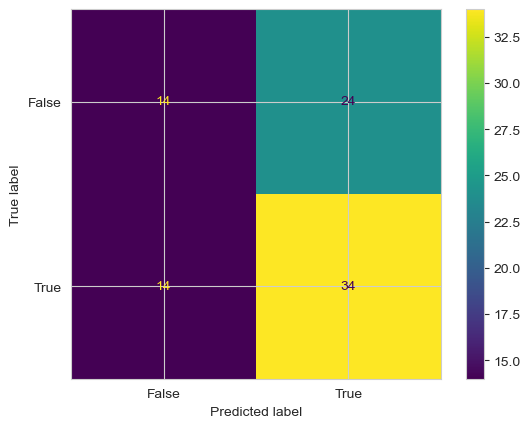

In [180]:
cm3 = confusion_matrix(b_test, pred3, labels=lr3.classes_)
disp3 = ConfusionMatrixDisplay(confusion_matrix=cm3,
                              display_labels=lr3.classes_)
disp3.plot()
plt.show()